In [1]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix

import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

bank_data = pd.read_csv('bank-additional-full.csv')

C:\Users\Milos\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
#Handling categorical variables
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week', 'poutcome', 'y']
bank_data_tran = pd.get_dummies(bank_data, columns = categorical_features, drop_first=True)

#because of the high correlation coefficient between euribor3m rate and nr. of employed, the latter is going to be dropped
bank_data_tran.drop(['nr.employed'], axis = 1, inplace = True)

#apllying the same logic, emp.var.rate is going to be dropped
bank_data_tran.drop(['emp.var.rate'], axis = 1, inplace = True)

In [18]:
#Data preprocessing and splitting and scaling
x = bank_data_tran.iloc[:,bank_data_tran.columns != 'y_yes'].values
y = bank_data_tran.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [35]:
sm = SMOTE(random_state=12, ratio = 1.0, k_neighbors = 5)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

C:\Users\Milos\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [36]:
#Decision tree algorithm

td_classifier = DecisionTreeClassifier(criterion='entropy', random_state = 0, splitter = 'best')
td_classifier.fit(x_train_res, y_train_res)

predictions_DT_val = td_classifier.predict(x_val)
print("Validation set predictions: \n\n" + classification_report(y_val,predictions_DT_val))

print("\n Confusion matrix:\n " , confusion_matrix(y_val, predictions_DT_val))

precision, recall, thresholds = precision_recall_curve(y_val, td_classifier.predict_proba(x_val)[:,1])
area = auc(recall, precision)
print("\nArea under precission-recall is:", area)

Validation set predictions: 

             precision    recall  f1-score   support

          0       0.94      0.93      0.94      5841
          1       0.51      0.53      0.52       749

avg / total       0.89      0.89      0.89      6590


 Confusion matrix:
  [[5461  380]
 [ 355  394]]

Area under precission-recall is: 0.54447406992


In [37]:
#Random Forest Classification Algorithm

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
classifier.fit(x_train_res, y_train_res)

# Predicting the Test set results
predictions_RF_val = classifier.predict(x_val)

# Making the Confusion Matrix
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_val, predictions_RF)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_val, predictions_RF_val)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, thresholds = precision_recall_curve(y_val, classifier.predict_proba(x_val)[:,1])
area = auc(recall, precision)
print("\nArea under precission-recall is:", area)

print("\nValidation set predictions: \n\n" + classification_report(y_val,predictions_RF_val))

#predictions_RF_test = classifier.predict(x_test)
#print("Test predictions:\n\n " + classification_report(y_test, predictions_RF_test))

"""
##Computing false and true positive rates
fpr, tpr,_=roc_curve(y_val, predictions_RF_val, drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show() 

print("Score", roc_auc_score(y_val, predictions_RF_val))"""

Average precision-recall score: 0.37

Area under precission-recall is: 0.649656501921

Validation set predictions: 

             precision    recall  f1-score   support

          0       0.94      0.96      0.95      5841
          1       0.62      0.50      0.56       749

avg / total       0.90      0.91      0.90      6590



'\n##Computing false and true positive rates\nfpr, tpr,_=roc_curve(y_val, predictions_RF_val, drop_intermediate=False)\n\nimport matplotlib.pyplot as plt\nplt.figure()\n##Adding the ROC\nplt.plot(fpr, tpr, color=\'red\',\n lw=2, label=\'ROC curve\')\n##Random FPR and TPR\nplt.plot([0, 1], [0, 1], color=\'blue\', lw=2, linestyle=\'--\')\n##Title and label\nplt.xlabel(\'FPR\')\nplt.ylabel(\'TPR\')\nplt.title(\'ROC curve\')\nplt.show() \n\nprint("Score", roc_auc_score(y_val, predictions_RF_val))'

In [60]:
# Feature Scaling
sc = StandardScaler()
x_train_res = sc.fit_transform(x_train_res)
x_test = sc.transform(x_test)
x_val = sc.transform(x_val)

In [13]:
#Logistic Regression Algorithm

logdown = LogisticRegression()
logdown.fit(x_train_res, y_train_res)
predictions_LR = logdown.predict(x_val)

precision, recall, thresholds = precision_recall_curve(y_val, logdown.predict_proba(x_val)[:,1])
area = auc(recall, precision)
print("Area is", area)

print(classification_report(y_val,predictions_LR))

precision, recall, thresholds = precision_recall_curve(y_val, logdown.predict_proba(x_val)[:,1])
area = auc(recall, precision)
print("\nArea under precission-recall is:", area)

"""##Computing false and true positive rates
fpr, tpr,_=roc_curve(predictions_LR,y_val,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show() """

Area is 0.575117507785
             precision    recall  f1-score   support

          0       0.98      0.86      0.91      5841
          1       0.44      0.87      0.58       749

avg / total       0.92      0.86      0.88      6590


Area under precission-recall is: 0.575117507785


"##Computing false and true positive rates\nfpr, tpr,_=roc_curve(predictions_LR,y_val,drop_intermediate=False)\n\nimport matplotlib.pyplot as plt\nplt.figure()\n##Adding the ROC\nplt.plot(fpr, tpr, color='red',\n lw=2, label='ROC curve')\n##Random FPR and TPR\nplt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')\n##Title and label\nplt.xlabel('FPR')\nplt.ylabel('TPR')\nplt.title('ROC curve')\nplt.show() "

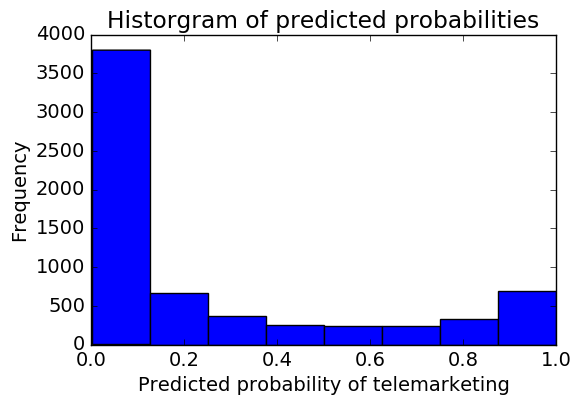

In [14]:
y_pred_prob = logdown.predict_proba(x_val)[:, 1]

plt.rcParams['font.size'] = 14
plt.hist(y_pred_prob, bins = 8)
plt.xlim(0,1)
plt.title("Historgram of predicted probabilities")
plt.xlabel("Predicted probability of telemarketing")
plt.ylabel("Frequency")


[[3500 2341]
 [   5  744]]
             precision    recall  f1-score   support

          0       1.00      0.60      0.75      5841
          1       0.24      0.99      0.39       749

avg / total       0.91      0.64      0.71      6590

Average precision-recall score: 0.24


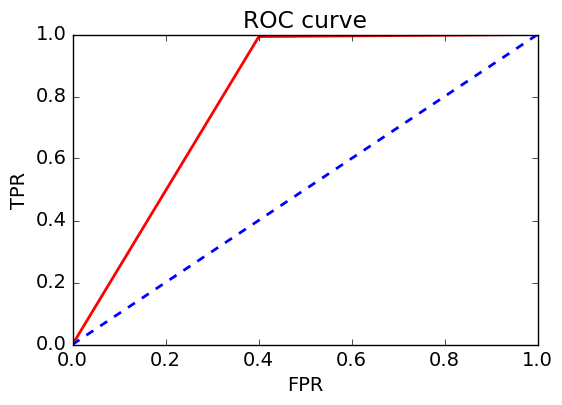

In [15]:
#Since we can see highest number of instances have class probability around 0.25, we will set that as a limit, maybe 0.3
y_pred_prob = y_pred_prob.reshape(1,-1)
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob, 0.1)[0]

print (confusion_matrix(y_val, y_pred_class))
print(classification_report(y_val,y_pred_class))

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_val, y_pred_class)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

##Computing false and true positive rates
fpr, tpr,_=roc_curve(y_val, y_pred_class,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show() 



In [31]:
#SVM algorithm

#svm_classifier = SVC(kernel = 'linear', random_state = 0)
#svm_classifier.fit(x_train, y_train)

#predictions_SVC_val = svm_classifier.predict(x_val)
#print("Validation set predictions: \n\n" + classification_report(y_val,predictions_SVC_val))

#predictions_SVC_test = svm_classifier.predict(x_test)
#print("Test set predictions:\n\n" + classification_report(y_test, predictions_SVC_test))

In [16]:
#KNN Algorithm

#knn_classifier = KNeighborsClassifier(n_neighbors=25, metric = 'minkowski', p = 2)
#knn_classifier.fit(x_train, y_train)

#predictions_KNN_val = knn_classifier.predict(x_val)
#print("Validation set predictions: \n\n" + classification_report(y_val,predictions_KNN_val))

error_rate = []

# Will take some time
for i in range(1,50):    
    knn_classifier = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p = 2)
    knn_classifier.fit(x_train, y_train)
    pred_i = knn_classifier.predict(x_val)
    error_rate.append(np.mean(pred_i != y_val))
#predictions_KNN_test = knn_classifier.predict(x_test)
#print("Test set predictions:\n\n" + classification_report(y_test, predictions_KNN_test))






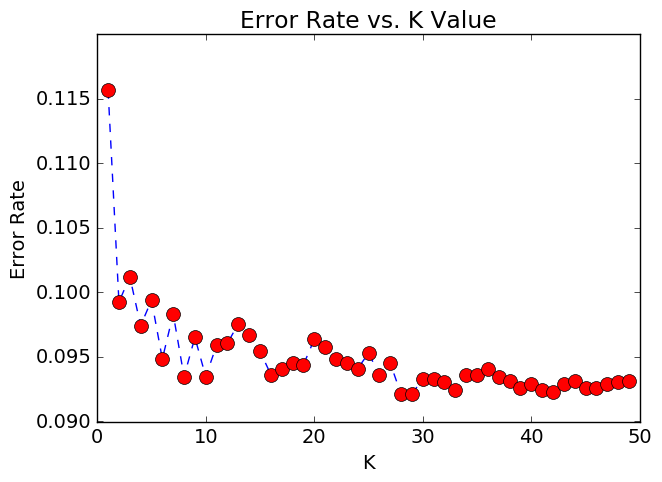

In [21]:
plt.figure(figsize=(7,5))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [19]:
knn_classifier = KNeighborsClassifier(n_neighbors=28, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train_res, y_train_res)
pred_i = knn_classifier.predict(x_val)

print("Validation set predictions: \n\n" + classification_report(y_val,pred_i))

precision, recall, thresholds = precision_recall_curve(y_val, knn_classifier.predict_proba(x_val)[:,1])
area = auc(recall, precision)
print("\nArea under precission-recall is:", area)

"""##Computing false and true positive rates
fpr, tpr,_=roc_curve(y_val, pred_i, drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show() """

Validation set predictions: 

             precision    recall  f1-score   support

          0       0.98      0.83      0.90      5841
          1       0.40      0.89      0.55       749

avg / total       0.92      0.84      0.86      6590


Area under precission-recall is: 0.583211855571


"##Computing false and true positive rates\nfpr, tpr,_=roc_curve(y_val, pred_i, drop_intermediate=False)\n\nimport matplotlib.pyplot as plt\nplt.figure()\n##Adding the ROC\nplt.plot(fpr, tpr, color='red',\n lw=2, label='ROC curve')\n##Random FPR and TPR\nplt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')\n##Title and label\nplt.xlabel('FPR')\nplt.ylabel('TPR')\nplt.title('ROC curve')\nplt.show() "

In [20]:
# Gaussian Naive Bayes
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
# load the iris datasets
# fit a Naive Bayes model to the data
model = GaussianNB()
model.fit(x_train_res, y_train_res)
print(model)
# make predictions
predicted = model.predict(x_val)
# summarize the fit of the model
print(metrics.classification_report(y_val, predicted))
print(metrics.confusion_matrix(y_val, predicted))

precision, recall, thresholds = precision_recall_curve(y_val, model.predict_proba(x_val)[:,1])
area = auc(recall, precision)
print("\nArea under precission-recall is:", area)

GaussianNB(priors=None)
             precision    recall  f1-score   support

          0       0.94      0.90      0.92      5841
          1       0.41      0.57      0.48       749

avg / total       0.88      0.86      0.87      6590

[[5228  613]
 [ 324  425]]

Area under precission-recall is: 0.4814017045
